# MINI PROJECT 

## The problem statement here is to predict churn from the bank customer dataset. Apply a suitable machine learning algorithm and predict which customers are most likely to leave the bank.

###  Importing all necessary libraries

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
dataset = pd.read_csv(r'Bank_Customer_Churn_dataset.csv')

###  Data Preparation and Data Cleaning 

In [3]:
dataset.shape

(10000, 14)

In [4]:
dataset.dtypes

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [5]:
dataset.drop('Surname' , inplace = True ,axis = 1)

In [6]:
dataset.drop('RowNumber' , inplace = True ,axis = 1)

In [7]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerId       10000 non-null  int64  
 1   CreditScore      10000 non-null  int64  
 2   Geography        10000 non-null  object 
 3   Gender           10000 non-null  object 
 4   Age              10000 non-null  int64  
 5   Tenure           10000 non-null  int64  
 6   Balance          10000 non-null  float64
 7   NumOfProducts    10000 non-null  int64  
 8   HasCrCard        10000 non-null  int64  
 9   IsActiveMember   10000 non-null  int64  
 10  EstimatedSalary  10000 non-null  float64
 11  Exited           10000 non-null  int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 937.6+ KB


In [8]:
features = dataset.iloc[:,:11].values

In [9]:
label = dataset.iloc[:,-1].values

In [10]:
label.shape

(10000,)

In [11]:
features = pd.DataFrame(features,columns=['CustomerId','CreditScore','Geography','Gender','Age','Tenure','Balance','NumOfProducts','HasCrCard','IsActiveMember','EstimatedSalary'])

In [12]:
features.head()

,CustomerId,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,15634602,619,France,Female,42,2,0,1,1,1,101349
1,15647311,608,Spain,Female,41,1,83807.9,1,0,1,112543
2,15619304,502,France,Female,42,8,159661,3,1,0,113932
3,15701354,699,France,Female,39,1,0,2,0,0,93826.6
4,15737888,850,Spain,Female,43,2,125511,1,1,1,79084.1


In [13]:
label = pd.DataFrame(label,columns = ['Exited'])

In [14]:
label.head()

,Exited
0,1
1,0
2,1
3,0
4,0


In [15]:
features = pd.get_dummies(features, columns = ['Geography','Gender'])

In [16]:
features = features.drop(['Geography_Germany','Gender_Male'],axis=1)

In [17]:
features.head()

,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Spain,Gender_Female
0,15634602,619,42,2,0,1,1,1,101349,1,0,1
1,15647311,608,41,1,83807.9,1,0,1,112543,0,1,1
2,15619304,502,42,8,159661,3,1,0,113932,1,0,1
3,15701354,699,39,1,0,2,0,0,93826.6,1,0,1
4,15737888,850,43,2,125511,1,1,1,79084.1,0,1,1


### Splitting Train-Test Dataset  

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
features_train,features_test,label_train,label_test = train_test_split(features,label,test_size = 0.2)

In [20]:
print(features_train.shape)
print(features_test.shape)
print(label_train.shape)
print(label_test.shape)

(8000, 12)
(2000, 12)
(8000, 1)
(2000, 1)


### Model Preparation  

In [21]:
from sklearn.linear_model import LogisticRegression

In [22]:
model = LogisticRegression()
model.fit(features_train,label_train)

/home/linux/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [23]:
model.coef_

array([[-1.14292560e-07, -1.34354898e-09,  1.94480037e-09,
        -2.36188549e-11,  4.54273643e-06, -1.88898453e-11,
        -4.66799077e-13, -5.04956969e-11,  4.67539823e-07,
        -3.48573709e-11, -1.51225712e-11,  3.53199319e-11]])

In [24]:
model.intercept_

array([1.88638628e-14])

In [25]:
label_pred = model.predict(features_test)

In [26]:
print(label_pred)


[0 0 0 ... 0 0 0]


In [27]:
print(label_test)

      Exited
4345       1
1630       1
8326       0
367        0
2629       1
...      ...
239        0
7036       0
9960       1
4942       0
4825       0

[2000 rows x 1 columns]


###  Evaluting Model 

1.Accuracy

In [28]:

from sklearn.metrics import accuracy_score
acc = accuracy_score(label_test,label_pred)
acc

0.7875

2.Confusion Matrix 


In [29]:

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(label_test,label_pred,labels=[0,1,2])
cm

array([[1575,    0,    0],
       [ 425,    0,    0],
       [   0,    0,    0]])

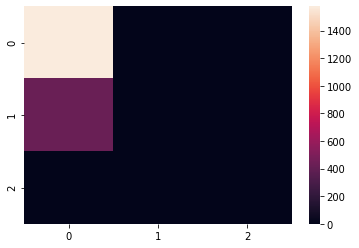

In [30]:
import seaborn as sns 
sns.heatmap(cm)

3. Recall 

In [31]:
rm =(((cm.T)/(cm.sum(axis=1))).T) 
rm

/home/linux/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in true_divide
  """Entry point for launching an IPython kernel.


array([[ 1.,  0.,  0.],
       [ 1.,  0.,  0.],
       [nan, nan, nan]])

4.Precision matrix 

In [32]:
pm =(cm/cm.sum(axis=0)) 
pm

/home/linux/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in true_divide
  """Entry point for launching an IPython kernel.


array([[0.7875,    nan,    nan],
       [0.2125,    nan,    nan],
       [0.    ,    nan,    nan]])

5.F1 Score 

In [33]:
F1 = 2*pm*rm/(pm+rm)
F1

array([[0.88111888,        nan,        nan],
       [0.35051546,        nan,        nan],
       [       nan,        nan,        nan]])